# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aikal Ichsan Alqadri
- **Email:** aikalichsan2@gmail.com
- **ID Dicoding:** aikal_ichsan_GPyH

## Menentukan Pertanyaan Bisnis

- Pada bulan apa jasa rental sepeda paling banyak dan paling sedikit tersewa?
- Bagaimana perbandingan jumlah pengguna kasual dan pengguna yang mendaftar per jamnya?

## Import Semua Packages/Library yang Digunakan

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [312]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Disini kita memuat tabel day. Kode diatas menampilkan 5 baris pertama dari DataFrame day_df.

In [313]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Disini kita memuat tabel hour. Kode diatas menampilkan 5 baris pertama dari DataFrame hour_df.

### Assessing Data

#### Menilai data day_df

In [314]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat dilihat pada data yang dihasilkan diatas, kode diatas akan memberikan informasi dari day_df. Informasi yang tersedia antara lain nama kolom, banyak data, dan tipe data.

Berdasarkan informasi yang diberikan, tidak ada masalah dengan tipe data maupun jumlah data. Kode dibawah akan memberi informasi berapa banyak jumlah data yang hilang.

In [315]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tabel diatas menunjukkan bahwa tidak terdapat missing values pada kolom apapun.

In [316]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Dapat dilihat juga bahwa tidak terdapat data yang terduplikat.

In [317]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Terdapat kesalahan pada max value weathersit.

Pada tabel menunjukkan valuenya adalah 3, dimana berdasarkan README.md yang diberikan bersamaan dengan dataset ini dan berdasarkan `hour_df`, valuenya seharusnya 4.

Akan dibersihkan dalam tahap cleaning data.

#### Menilai data hour_df

In [318]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan informasi yang diberikan, tidak ada masalah dengan tipe data maupun jumlah data. Kode dibawah akan memberi informasi berapa banyak jumlah data yang hilang.

In [319]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat data yang terduplikasi.

In [320]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat keanehan pada tabel diatas.

### Cleaning Data

#### Membersihkan data day_df

Mengatasi masalah inaccurate value pada kolom weathersit.

In [321]:
day_df[day_df.weathersit == day_df.weathersit.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623
89,90,2011-03-31,2,0,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646,179,1506,1685
105,106,2011-04-16,2,0,4,0,6,0,3,0.430833,0.425492,0.888333,0.340808,121,674,795
248,249,2011-09-06,3,0,9,0,2,1,3,0.540000,0.515200,0.886957,0.343943,204,2506,2710
249,250,2011-09-07,3,0,9,0,3,1,3,0.599167,0.544229,0.917083,0.097021,118,1878,1996
250,251,2011-09-08,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748,153,1689,1842
284,285,2011-10-12,4,0,10,0,3,1,3,0.543333,0.517717,0.906250,0.248150,217,2199,2416
291,292,2011-10-19,4,0,10,0,3,1,3,0.541739,0.513848,0.895217,0.243339,254,2170,2424
301,302,2011-10-29,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627


Pada tabel menunjukkan valuenya adalah 3, dimana berdasarkan README.md yang diberikan bersamaan dengan dataset ini dan berdasarkan `hour_df`, valuenya seharusnya 4.

Tetapi, setelah melihat banyaknya data yang memiliki value = 3 pada kolom weathersit, menandakan hal tersebut bukan inaccurate value. 

## Exploratory Data Analysis (EDA)

### Explorasi data day_df

In [322]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Diatas merupakan rangkuman parameter statistik day_df.

In [323]:
day_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431


Diatas menunjukkan jumlah sepeda yang tersewa perharinya, dari yang terbanyak ke yang tersedikit.

In [324]:
day_df.groupby("mnth")["cnt"].sum()

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

Diatas menunjukkan jumlah sepeda yang tersewa per bulannya.

Berdasarkan tabel diatas, pertanyaan `Pada bulan apa jasa rental sepeda paling banyak dan paling sedikit tersewa?` sudah terjawab.

In [325]:
day_df.groupby("mnth")["cnt"].sum().describe()

count        12.000000
mean     274389.916667
std       78533.560256
min      134933.000000
25%      224449.000000
50%      295723.000000
75%      345208.750000
max      351194.000000
Name: cnt, dtype: float64

Diatas menunjukkan rangkuman parameter statistik tabel sebelumnya.

### Explorasi data hour_df

In [326]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Diatas merupakan rangkuman parameter statistik hour_df.

In [327]:
hour_df[["casual", "registered"]].describe()

,casual,registered
count,17379.000000,17379.000000
mean,35.676218,153.786869
std,49.305030,151.357286
min,0.000000,0.000000
25%,4.000000,34.000000
50%,17.000000,115.000000
75%,48.000000,220.000000
max,367.000000,886.000000


Diatas merupakan rangkuman parameter statistik hour_df antara dua kolom, yaitu `casual` dan `registered`.

Berdasarkan hasil diatas, pertanyaan `Bagaimana perbandingan jumlah pengguna kasual dan pengguna yang mendaftar per jamnya?` sudah terjawab.

### Data all_df

In [328]:
all_df = pd.merge(
    day_df,
    hour_df,
    on=["instant", "dteday", "season", "yr", "mnth", "holiday", "weekday",
        "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"],
    how="outer"
)
all_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual_x,registered_x,cnt_x,hr,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,1,0.240000,0.287900,0.810000,0.000000,NaN,NaN,NaN,0.0,3.0,13.0,16.0
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,NaN,NaN,NaN,NaN
2,2,2011-01-01,1,0,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,NaN,NaN,NaN,1.0,8.0,32.0,40.0
3,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,NaN,NaN,NaN,NaN
4,3,2011-01-01,1,0,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,NaN,NaN,NaN,2.0,5.0,27.0,32.0


Membuat DataFrame baru bernama all_df untuk menampung semua informasi dari kedua tabel yang kita miliki.

In [339]:
all_df.to_csv("main_data.csv", index=False)

## Visualization & Explanatory Analysis

### Geoanalysis

In [329]:
all_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual_x,registered_x,cnt_x,hr,casual_y,registered_y,cnt_y
count,18110.000000,18110,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,731.000000,731.000000,731.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8354.006405,NaN,2.501436,0.502485,6.537051,0.028769,3.003424,0.682772,1.424075,0.496922,0.475718,0.627256,0.190113,848.176471,3656.172367,4504.348837,11.546752,35.676218,153.786869,189.463088
std,5180.771860,NaN,1.107045,0.500008,3.439213,0.167160,2.005677,0.465410,0.635830,0.192177,0.171496,0.191147,0.120851,686.622488,1560.256377,1937.211452,6.914405,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,2.000000,20.000000,22.000000,0.000000,0.000000,0.000000,1.000000
25%,3797.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,315.500000,2497.000000,3152.000000,6.000000,4.000000,34.000000,40.000000
50%,8324.500000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.188951,713.000000,3662.000000,4548.000000,12.000000,17.000000,115.000000,142.000000
75%,12851.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,1096.000000,4776.500000,5956.000000,18.000000,48.000000,220.000000,281.000000


In [330]:
all_df.groupby("weathersit")["cnt_x"].sum()

weathersit
1    2257952.0
2     996858.0
3      37869.0
4          0.0
Name: cnt_x, dtype: float64

Menghitung berapa banyak sepeda yang disewa saat suatu kondisi cuaca. Disini cnt_x mengacu berapa banyak sepeda yang disewa dalam harinya (sumber dari day_df).

weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [331]:
all_df.groupby("weathersit")["cnt_y"].sum()

weathersit
1    2338173.0
2     795952.0
3     158331.0
4        223.0
Name: cnt_y, dtype: float64

Menghitung berapa banyak sepeda yang disewa saat suatu kondisi cuaca. Disini cnt_y mengacu berapa banyak sepeda yang disewa dalam jamnya (sumber dari hour_df).

weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

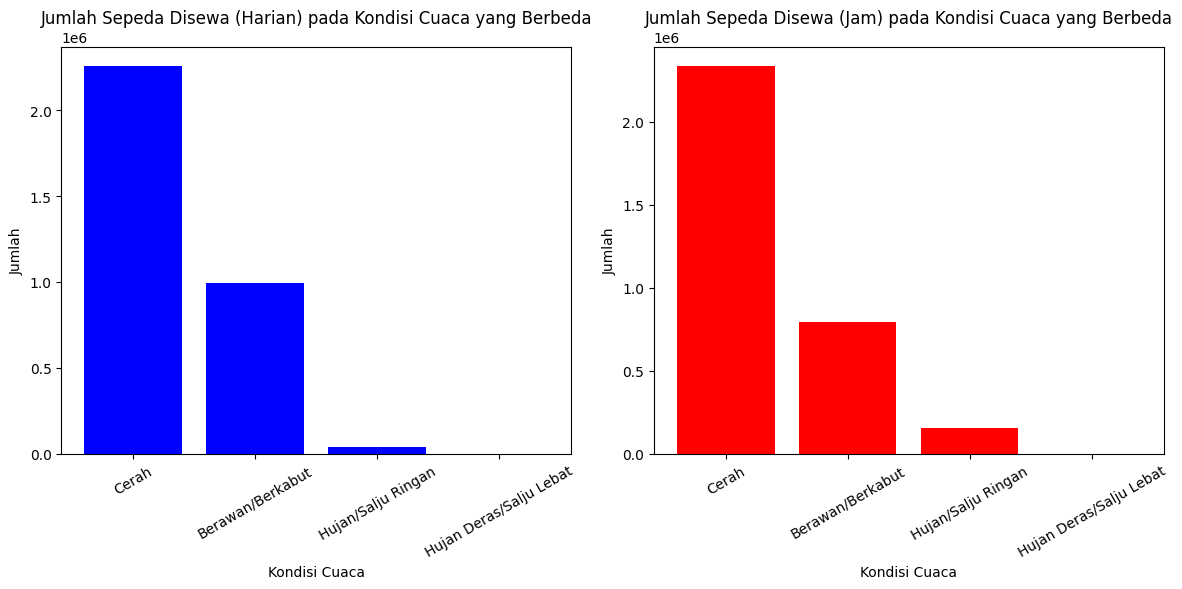

In [337]:
daySum = all_df.groupby("weathersit")["cnt_x"].sum().reset_index()
hourSum = all_df.groupby("weathersit")["cnt_y"].sum().reset_index()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(["Cerah", "Berawan/Berkabut", "Hujan/Salju Ringan", "Hujan Deras/Salju Lebat"], daySum['cnt_x'], color="b")
ax1.set_title("Jumlah Sepeda Disewa (Harian) pada Kondisi Cuaca yang Berbeda")
ax1.set_xlabel("Kondisi Cuaca")
ax1.set_ylabel("Jumlah")
ax1.tick_params(axis='x', rotation=30)

ax2.bar(["Cerah", "Berawan/Berkabut", "Hujan/Salju Ringan", "Hujan Deras/Salju Lebat"], hourSum['cnt_y'], color="r")
ax2.set_title("Jumlah Sepeda Disewa (Jam) pada Kondisi Cuaca yang Berbeda")
ax2.set_xlabel("Kondisi Cuaca")
ax2.set_ylabel("Jumlah")
ax2.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

Berikut adalah hasil visualisasi dari geoanalysis berapa banyaknya sepeda disewa pada kondisi cuaca yang berbeda. Tetapi, dikarenakan ada bar yang tidak terlihat karena nilainya terlalu kecil, maka garis y akan diskalakan dengan logaritma agar terlihat.

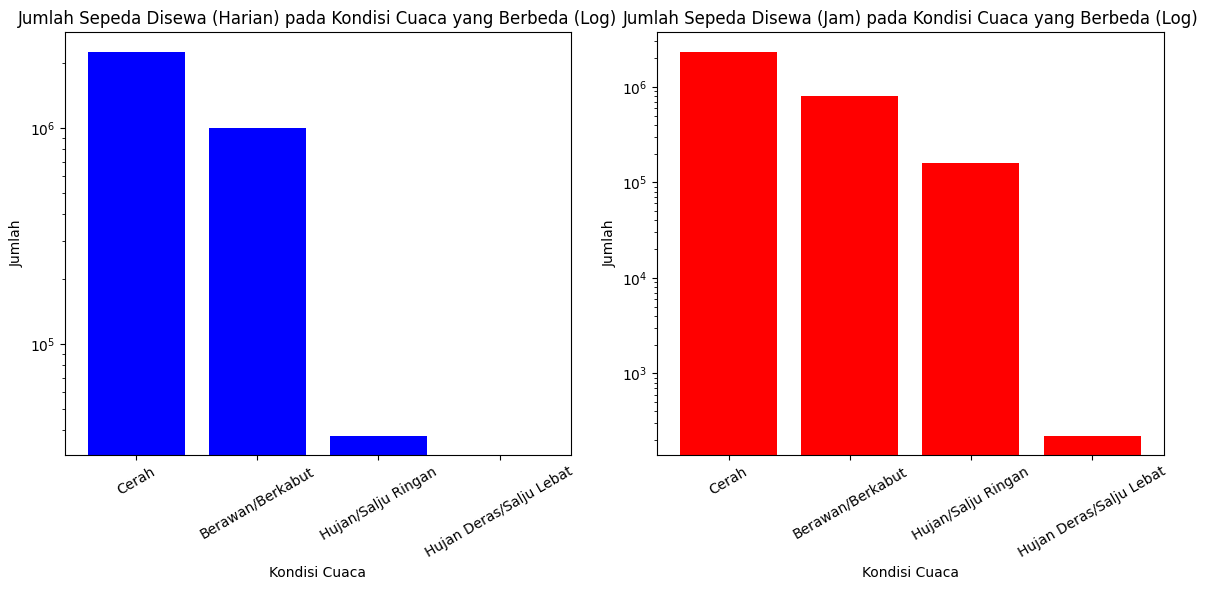

In [336]:
daySum = all_df.groupby("weathersit")["cnt_x"].sum().reset_index()
hourSum = all_df.groupby("weathersit")["cnt_y"].sum().reset_index()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(["Cerah", "Berawan/Berkabut", "Hujan/Salju Ringan", "Hujan Deras/Salju Lebat"], daySum['cnt_x'], color="b")
ax1.set_title("Jumlah Sepeda Disewa (Harian) pada Kondisi Cuaca yang Berbeda (Log)")
ax1.set_xlabel("Kondisi Cuaca")
ax1.set_ylabel("Jumlah")
ax1.set_yscale("log")
ax1.tick_params(axis='x', rotation=30)

ax2.bar(["Cerah", "Berawan/Berkabut", "Hujan/Salju Ringan", "Hujan Deras/Salju Lebat"], hourSum['cnt_y'], color="r")
ax2.set_title("Jumlah Sepeda Disewa (Jam) pada Kondisi Cuaca yang Berbeda (Log)")
ax2.set_xlabel("Kondisi Cuaca")
ax2.set_ylabel("Jumlah")
ax2.set_yscale("log")
ax2.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

Berikut adalah hasil visualisasi dari geoanalysis berapa banyaknya sepeda disewa pada kondisi cuaca yang berbeda setelah garis y diskalakan dengan logaritma.

Sepeda paling banyak disewa saat keadaan Cerah sebesar 2257952 pada harian dan 2338173 pada setiap jam. Sedangkan sepeda paling sedikit disewa saat keadaan Hujan Deras/Salju Lebat sebesar 0 pada harian dan 223 pada setiap jamnya.

### Pertanyaan 1:

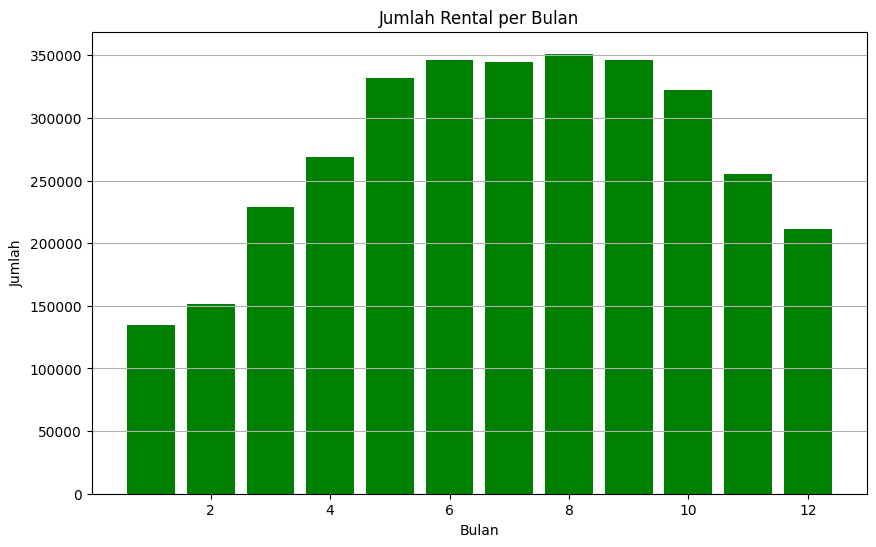

In [334]:
monthly = day_df.groupby("mnth")["cnt"].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(monthly["mnth"], monthly["cnt"], color='g')

plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.title("Jumlah Rental per Bulan")
plt.grid(axis="y")
plt.show()

Berdasarkan bar plot diatas, kita dapat melihat secara visual jumlah rental sepeda per bulannya. Rata-rata perentalan perbulannya adalah 274389, paling banyaknya adalah 351194 dan paling sedikitnya adalah 134933.

### Pertanyaan 2:

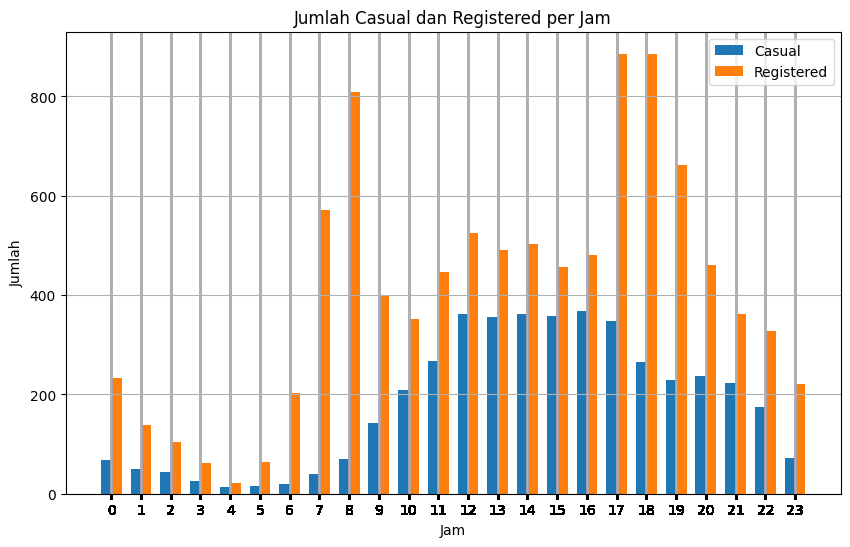

In [335]:
plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(hour_df["hr"] - bar_width/2, hour_df["casual"], bar_width, label="Casual")
plt.bar(hour_df["hr"] + bar_width/2, hour_df["registered"], bar_width, label="Registered")

plt.xlabel("Jam")
plt.ylabel("Jumlah")
plt.title("Jumlah Casual dan Registered per Jam")
plt.legend()
plt.xticks(index)
plt.grid(True)
plt.show()

Berdasarkan bar plot diatas, kita dapat melihat secara visual jumlah casual dan registered per jamnya. Rata-rata perjamnya untuk casual adalah 35.676218, untuk registerednya adalah 153.786869. Paling banyak untuk casualnya adalah 367 dan yang paling banyak untuk registered adalah 886.

## Conclusion

- Jumlah sepeda tersewa paling banyak terjadi pada bulan 8 (Agustus) sebanyak 351194, dan paling sedikit terjadi pada bulan 1 (Januari) sebanyak 134933.
- Secara rata-rata, pengguna registered lebih besar dibandingkan pengguna casual. Pengguna registered paling banyak sebesar 886 pada jam 18:00. Sedangkan pengguna casual paling banyak sebesar 367 pada jam 16:00.